In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

134 537
(10305, 63) (10305, 8)
0	 [0.22600167989730835]
5	 [0.20599454641342163]
10	 [0.20514091849327087]
15	 [0.20189645886421204]
20	 [0.20043519139289856]
25	 [0.19751834869384766]
30	 [0.19440196454524994]
35	 [0.1909817010164261]
40	 [0.1878407597541809]
45	 [0.18490460515022278]
50	 [0.18197739124298096]
55	 [0.17943072319030762]
60	 [0.17718450725078583]
65	 [0.17522649466991425]
70	 [0.17339244484901428]
75	 [0.17205794155597687]
80	 [0.1704346090555191]
85	 [0.16877172887325287]
90	 [0.16717185080051422]
95	 [0.1654842048883438]
100	 [0.1647702306509018]
105	 [0.16298390924930573]
110	 [0.1611821949481964]
115	 [0.15955767035484314]
120	 [0.15786585211753845]
125	 [0.15618881583213806]
130	 [0.15449342131614685]
135	 [0.15334391593933105]
140	 [0.1517019420862198]
145	 [0.14926138520240784]
150	 [0.14758504927158356]
155	 [0.1462344378232956]
160	 [0.1434486210346222]
165	 [0.14232322573661804]
170	 [0.1402672827243805]
175	 [0.13750171661376953]
180	 [0.13613927364349365]
18

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

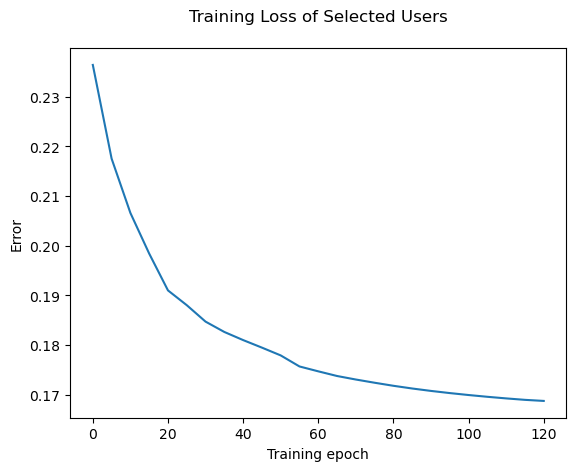

In [2]:
for respond_perc in [.75, .25, .5]:
# for respond_perc in [.75]:
    for estate, include_state, fullq in [(False, True, True)]:
    # for estate, include_state in [(True, True), (False, True), (False, False)]:
        for model in ["AdaptableLSTM", "BasicNN"]:
            for learning_rate in [.012]:
                test_metrics, train_metrics, adjusted_losses = [], [], []
                epochs = 200
                if (model != "AdaptableLSTM"):
                    epochs = 120
                    learning_rate *= .2
                for seed in range(1):
                    np.random.seed(seed)
                    torch.manual_seed(seed)
                    e = Experiment(
                        numValFolds = 5,
                        data_kw={"minw": 2,
                                "maxw": 29,
                                "include_state": include_state,
                                "include_pid": False,
                                "expanded_states": estate,
                                "top_respond_perc": respond_perc,
                                "full_questionnaire": fullq},
                        model=model,
                        model_kw={
                            "lossfn": "MSELoss",
                            # "lossfn": "NDCG",
                            # "lossfn": "CrossEntropyLoss",
                            "hidden_size": 200, 
                            "opt_kw": {
                                "lr": learning_rate
                            }
                        },
                        train_kw={
                            "epochs": epochs,
                            "n_subj": 500,
                            "rec_every": 5,
                        })

                    report = e.runValidation()



                    individual_test_scores, labels = e.report_scores_individual_test()
                    individual_train_scores, labels = e.report_scores_individual_train()



                    dire = "./validation_experiment_output/"
                    fileprefix = f"{model}LR{learning_rate}Resp{respond_perc}States{int(include_state)}Expanded{int(estate)}"
                    np.savetxt(f"{dire}TRAINMETRICS-{fileprefix}S{seed}.csv", report["train_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}TESTMETRICS-{fileprefix}S{seed}.csv", report["test_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}IDVDTESTMETRICS-{fileprefix}S{seed}.csv", individual_test_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}IDVDTRAINMETRICS-{fileprefix}S{seed}.csv", individual_train_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}TRAINLOSSES-{fileprefix}S{seed}.csv", report["loss"], delimiter = ',')

                    plt.clf()
                    splot = plt.scatter(individual_test_scores[:, -1], individual_test_scores[:, -2])
                    plt.title("Test Accuracy vs Response Count")
                    plt.savefig(f"{dire}/img/TestACCvResponse-{fileprefix}S{seed}.png")
                    plt.clf()
                    splot = plt.scatter(individual_train_scores[:, -1], individual_train_scores[:, -2])
                    plt.title("Train Accuracy vs Response Count")
                    plt.savefig(f"{dire}/img/TrainACCvResponse-{fileprefix}S{seed}.png")
                    plt.clf()


                    writer = open(f"{dire}ALOSS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss[0]) for loss in report["loss"]]))
                    writer.write("\n")
                    writer.close()

                    writer = open(f"{dire}FINALTRAINMETRICS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss) for loss in report["train_metrics"][-1, :]]))
                    writer.write("\n")
                    writer.close()

                    writer = open(f"{dire}FINALTESTMETRICS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss) for loss in report["test_metrics"][-1, :]]))
                    writer.write("\n")
                    writer.close()

                    Plotter.training_loss(report, dire)

